In [1]:
import pandas as pd

#Importing the Dataset

data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")


In [2]:
#Display Top 5 Rows of The Dataset
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
print("Number of Rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of Rows 7352
Number of columns 563


In [4]:
data.duplicated().any()
duplicated_columns = data.columns[data.T.duplicated()].tolist()
len(duplicated_columns)

21

In [5]:
data = data.drop(duplicated_columns,axis=1)
data.shape

(7352, 542)

In [6]:
data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 542, dtype: int64

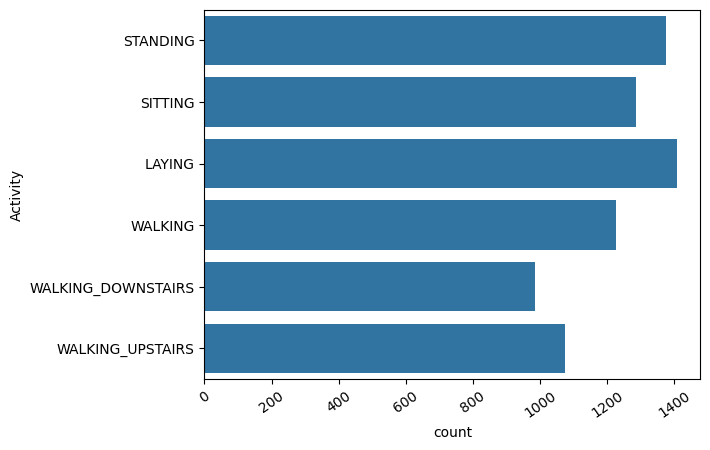

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data['Activity'])
plt.xticks(rotation=35)
plt.show()

In [8]:
X = data.drop('Activity',axis=1)
y= data['Activity']
y

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 2, 2, ..., 5, 5, 5])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log  = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred1 = log.predict(X_test)
accuracy_score(y_test,y_pred1)

0.9796057104010877

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
y_pred2 = rf.predict(X_test)
accuracy_score(y_test,y_pred2)

0.9850441876274643

In [14]:
from sklearn.feature_selection import SelectKBest,f_classif
k=200
selector = SelectKBest(f_classif,k=k)
X_train_selected = selector.fit_transform(X_train,y_train)
X_test_selected = selector.transform(X_test)


selected_indices=selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]
print(len(selected_features))

200


In [15]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [16]:
estimator = RandomForestClassifier()


In [17]:
k=100
rfe_selector = RFE(estimator,n_features_to_select=k)
X_train_selected_rfe = rfe_selector.fit_transform(X_train_selected,y_train)
X_test_selected_rfe = rfe_selector.transform(X_test_selected)

selected_indices_rfe = rfe_selector.get_support(indices=True)
selected_features_rfe = selected_features[selected_indices_rfe]
print(selected_features_rfe)

Index(['tBodyAcc-std()-X', 'tBodyAcc-mad()-X', 'tBodyAcc-max()-X',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-entropy()-X',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-max()-X',
       'tGravityAcc-max()-Y', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y',
       'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y',
       'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-mad()-X', 'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z',
       'tBodyAccJerk-max()-X', 'tBodyAccJerk-max()-Y', 'tBodyAccJerk-max()-Z',
       'tBodyAccJerk-sma()', 'tBodyAccJerk-energy()-X',
       'tBodyAccJerk-energy()-Y', 'tBodyAccJerk-iqr()-X',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-entropy()-Z',
       'tBodyGyro-std()-X', 'tBodyGyro-std()-Y', 'tBodyGyro-mad()-X',
       'tBodyGyro-mad()-Y', 'tBodyGyro-mad()-Z', 'tBodyGyro-max()-X',
       'tBodyGyro-min()-X', 'tBodyGyro-iqr()-X', 'tBodyGyro-iqr()-Y',
       'tBodyGyro-iqr()-

In [18]:
print(len(selected_features_rfe))

100


In [20]:

rf = RandomForestClassifier()
rf.fit(X_train_selected_rfe,y_train)
y_pred_rf = rf.predict(X_test_selected_rfe)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rf)

0.9782460910944936

In [22]:
import joblib
joblib.dump(rf,"model_rfe")

['model_rfe']

In [23]:
import joblib
joblib.dump(selector,"k_best_selector")

['k_best_selector']

In [24]:
joblib.dump(rfe_selector,"rfe_selector")

['rfe_selector']

In [25]:
data_test=data_test.drop("Activity",axis=1)
duplicated_columns = data_test.columns[data_test.T.duplicated()].to_list()
data_test = data_test.drop(duplicated_columns,axis=1)
model = joblib.load('model_rfe')
selector = joblib.load('k_best_selector')
rfe_selector = joblib.load('rfe_selector')
selector=selector.transform(data_test)
X_test_selected_rfe = rfe_selector.transform(selector)
model.predict(X_test_selected_rfe)

array([2, 2, 2, ..., 5, 5, 5])

In [28]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import joblib
from tkinter import messagebox

def open_file():
    filepath=filedialog.askopenfile(filetypes=[("CSV Files",".csv")])
    if filepath:
        try:
            data=pd.read_csv(filepath)
            process_data(data)
        except Exception as e:
            messagebox.showerror("Error",f"Failed to open file {e}")
            
def process_data(data):
    # Find columns with the same values
    #data= data.drop("Activity",axis=1)
    duplicated_columns = data.columns[data.T.duplicated()].tolist()
    # Remove columns with the same values
   
    data_test = data.drop(duplicated_columns, axis=1)
 
    model = joblib.load("model_rfe")
    # Load the SelectKBest object from the file
    selector = joblib.load('k_best_selector')
    rfe_selector = joblib.load('rfe_selector')
    
    # Transform the new data using the loaded SelectKBest object
    X_test_selected = selector.transform(data_test)
    
    # Transform the new data using the loaded RFE object
    X_test_selected_rfe = rfe_selector.transform(X_test_selected)
    y_pred=model.predict(X_test_selected_rfe)
    # standing : 0, sitting : 1,laying : 2, WALKING_DOWNSTAIRS: 3, 
    # walking_upstairs:4,walking : 5
    y_pred = pd.Series(y_pred)
    y_pred = y_pred.map({0: 'Standing',1:'Sitting',2:'Laying',
                        3: 'Walking_downstairs',4: 'Walking_upstairs',
                        5:"Walking"})
    data['Predicted_target']=y_pred
    save_file(data)

def save_file(data):
    savepath=filedialog.asksaveasfilename(defaultextension=".csv",
                              filetypes=[("CSV Files",".csv")])
    if savepath:
        try:
            data.to_csv(savepath)
            messagebox.showinfo("Success","File Saved Successfully")
        except Exception as e:
            messagebox.showerror("Error",f"Failed to save file:{e}")
            
    
# Create a Tkinter GUI

root = tk.Tk()

root.title("Classification")

root.geometry("200x200")

button1 = tk.Button(root,text="Open CSV File",
                   width=15,
                   height=2,
                   background="lightgreen",
                   activebackground="lightblue",
                   font=("Arial",11,"bold"),
                   command=open_file)

button1.pack(pady=50)

root.mainloop()